In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from genetic_one import Gen1

In [68]:

def xyz_gen(gen, function):
    
    x=[x[0] for x in gen]
    y=[x[1] for x in gen]
    z=[function([x[i],y[i]]) for i in range(len(gen))]
    return x,y,z

[[5000.99969142 4976.05101383 4951.19674597 ... 4926.43840743
  4951.19674597 4976.05101383]
 [4976.05101383 4951.07145958 4926.1875467  ... 4901.40171019
  4926.1875467  4951.07145958]
 [4951.19674597 4926.1875467  4901.27614754 ... 4876.46583407
  4901.27614754 4926.1875467 ]
 ...
 [4926.43840743 4901.40171019 4876.46583407 ... 4851.63482346
  4876.46583407 4901.40171019]
 [4951.19674597 4926.1875467  4901.27614754 ... 4876.46583407
  4901.27614754 4926.1875467 ]
 [4976.05101383 4951.07145958 4926.1875467  ... 4901.40171019
  4926.1875467  4951.07145958]]


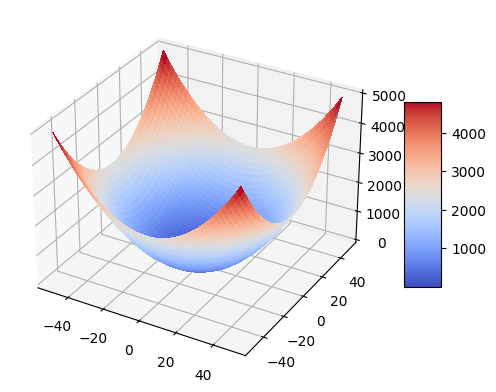

In [110]:
def function_a(x):

    y=x[1]
    x=x[0]
    r = np.sin(np.sqrt(x*x+y*y))+x*x+y*y
#     print(np.sin(np.sqrt(x*x+y*y)))
    return r

a = 50
X1 =  np.arange(-a, a, 0.25)#[ i for i in range(-a,a)]
X2 =  np.arange(-a, a, 0.25) #[ i for i in range(-a,a)]


# Z = np.array([[0 for _ in X1] for _ in X2])
# for i, x1 in enumerate(X1):
#     for j, x2 in enumerate(X2):
#         print(function_a([x1,x2])
# #         Z[i][j]=function_a([x1,x2])
# #         print(Z[i][j])
              
Z= np.array([[function_a([x1,x2]) for x2 in X2] for x1 in X1])
print(Z)  


X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
# ax.set_zlim(-1.01, 1.01)
plt.show()

In [111]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'cell_split_number': 10, 
    'subjects_in_cell': 1,

    'nr_clones': 5,
    'mutation_gaussian_sd': 4,

    'pins': 5,
    'gene_quality': 1,
    
}

#
input_size = 2 # since our function has one variable this is a trivial scenario.
bounds =[[-a,a],[-a,a]] # searching intervals for the solution

# Experiment
experiment = Gen1(function_a ,input_size, bounds, model_par)

gen_0 [[-45, -42], [-42, -34], [-46, -27], [-48, -15], [-43, -5], [-44, 4], [-47, 13], [-40, 26], [-48, 34], [-44, 44], [-33, -40], [-37, -40], [-37, -22], [-32, -20], [-36, -2], [-37, 5], [-33, 16], [-35, 27], [-31, 33], [-39, 45], [-23, -40], [-29, -34], [-30, -25], [-21, -20], [-25, -4], [-27, 2], [-25, 14], [-25, 27], [-23, 31], [-26, 50], [-10, -42], [-19, -36], [-20, -28], [-18, -20], [-10, -8], [-13, 0], [-12, 11], [-20, 25], [-10, 40], [-16, 43], [-4, -47], [-1, -32], [-3, -26], [0, -19], [-9, -4], [-8, 5], [-1, 15], [-5, 24], [-1, 31], [0, 43], [2, -42], [7, -33], [9, -26], [6, -18], [7, -2], [9, 3], [10, 14], [10, 21], [1, 40], [9, 40], [17, -50], [16, -34], [15, -20], [15, -16], [14, -7], [18, 7], [19, 12], [11, 29], [17, 32], [15, 42], [25, -49], [26, -37], [28, -26], [26, -14], [20, -7], [27, 5], [25, 11], [30, 25], [30, 31], [25, 47], [31, -41], [30, -36], [37, -29], [38, -10], [30, 0], [40, 0], [38, 14], [38, 26], [37, 34], [30, 44], [40, -41], [41, -34], [44, -30], [50,

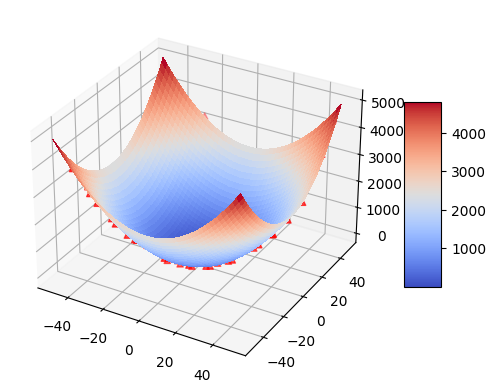

In [112]:
# first generation
# 'cell_split_number': 5 and  'subjects_in_cell': 2,
#  we expect 10 possible solutions.

gen_0 = experiment.first_generation()
experiment.actual_generation = gen_0

print("gen_0", gen_0)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
# ax.set_zlim(-1.01, 1.01)
x,y,z = xyz_gen(gen_0, function_a)
ax.scatter(x,y,z , c='r', marker='^')
plt.show()

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_1806/548711513.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


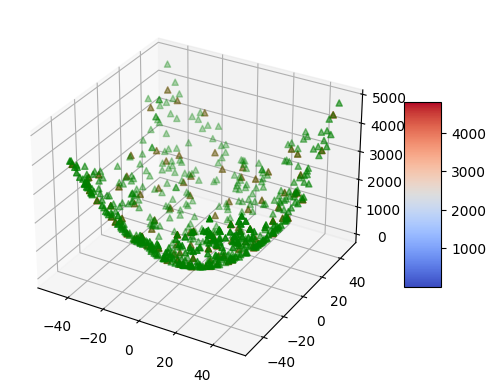

In [113]:
# mutation_1 

clone_family = experiment.mitosis()
# print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

# print("c_dist:",c_dist)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
# ax.set_zlim(-1.01, 1.01)
x,y,z = xyz_gen(gen_0, function_a)
ax.scatter(x,y,z , c='r', marker='^')
x,y,z = xyz_gen(c_dist, function_a)
ax.scatter(x,y,z , c='g', marker='^')


generation: [[-39, -41], [-40, -32], [-41, -25], [-41, -17], [-38, 3], [-37, -3], [-42, 5], [-33, 26], [-43, 34], [-45, 38], [-33, -40], [-36, -40], [-33, -22], [-24, -20], [-36, -2], [-34, -1], [-21, 17], [-36, 25], [-26, 27], [-37, 41], [-17, -34], [-28, -26], [-29, -23], [-21, -16], [-21, -4], [-24, 2], [-20, 15], [-22, 25], [-21, 25], [-25, 46], [-6, -33], [-18, -31], [-16, -21], [-16, -18], [-9, -8], [-4, -5], [-10, 8], [-14, 19], [-11, 36], [-12, 35], [-1, -43], [-8, -27], [-2, -24], [1, -11], [-7, -2], [-5, 2], [-4, 10], [-2, 17], [3, 25], [1, 39], [-2, -39], [4, -23], [7, -21], [3, -13], [6, -2], [7, 3], [9, 0], [9, 17], [0, 36], [5, 38], [21, -39], [13, -25], [19, -16], [15, -15], [13, -1], [14, 3], [19, 12], [2, 24], [14, 28], [11, 37], [19, -42], [26, -30], [27, -17], [26, -14], [19, -1], [21, -3], [17, 11], [28, 15], [25, 30], [23, 44], [31, -33], [24, -34], [30, -30], [31, -9], [27, -2], [36, 2], [33, 11], [35, 27], [30, 27], [26, 43], [35, -37], [38, -34], [41, -23], [47,

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_1806/3112930023.py:15: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


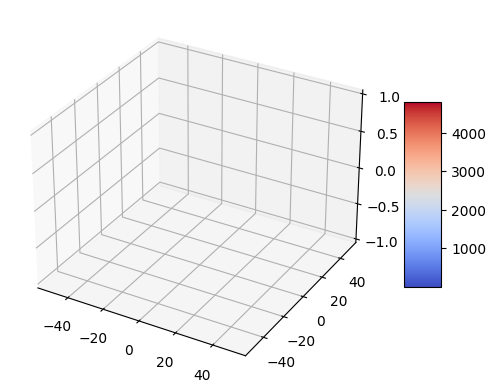

In [114]:
# kill_1

# Keep the best from each family and kill the underperformer.
generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)
x,y,z = xyz_gen(c_dist, function_a)
ax.scatter(x,y,z , c='g', marker='^')
x,y,z = xyz_gen(generation, function_a)
ax.scatter(x,y,z , c='b', marker='^')

new genration: [[20, -8], [-16, -12], [-18, -32], [-18, -32], [0, 2], [-1, -18], [-1, -18], [-38, -22], [-38, -22], [-39, -41]]


/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_1806/1658636930.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


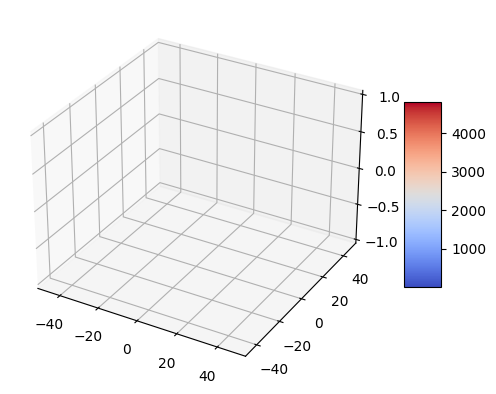

In [115]:
# reproduction_1

new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)




fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x1,y1,z1 = xyz_gen(generation, function_a)
ax.scatter(x1,y1,z1 , c='b', marker='^')

x,y,z = xyz_gen(new_generation, function_a)
ax.scatter(x,y,z , c='pink', marker='^')

clone_family: [[[20, -8], [22, -12], [21, -9], [23, -7], [26, -13], [24, -9]], [[-16, -12], [-19, -9], [-21, -14], [-29, -11], [-14, -11], [-10, -11]], [[-18, -32], [-19, -32], [-20, -33], [-21, -40], [-14, -29], [-24, -37]], [[-18, -32], [-19, -32], [-26, -30], [-13, -37], [-21, -29], [-13, -37]], [[0, 2], [9, 0], [3, 0], [1, 5], [-2, 5], [-6, -8]], [[-1, -18], [-4, -18], [3, -23], [3, -27], [-1, -18], [-9, -16]], [[-1, -18], [5, -18], [-3, -26], [-5, -11], [1, -20], [1, -13]], [[-38, -22], [-37, -20], [-41, -26], [-36, -15], [-38, -21], [-43, -23]], [[-38, -22], [-46, -21], [-41, -18], [-39, -19], [-34, -18], [-36, -19]], [[-39, -41], [-33, -43], [-39, -43], [-40, -40], [-37, -45], [-34, -41]]]
c_dist: [[20, -8], [22, -12], [21, -9], [23, -7], [26, -13], [24, -9], [-16, -12], [-19, -9], [-21, -14], [-29, -11], [-14, -11], [-10, -11], [-18, -32], [-19, -32], [-20, -33], [-21, -40], [-14, -29], [-24, -37], [-18, -32], [-19, -32], [-26, -30], [-13, -37], [-21, -29], [-13, -37], [0, 2], 

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_1806/3732450794.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


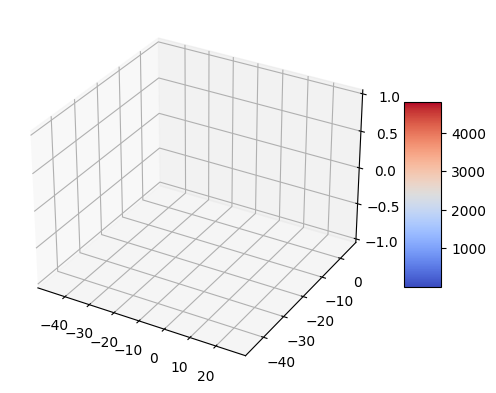

In [116]:
# mutation_2

experiment.actual_generation = new_generation
clone_family = experiment.mitosis()
print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x1,y1,z1 = xyz_gen(c_dist, function_a)
ax.scatter(x1,y1,z1 , c='g', marker='^')

x,y,z = xyz_gen(new_generation, function_a)
ax.scatter(x,y,z , c='r', marker='^')

generation: [[20, -8], [-10, -11], [-14, -29], [-21, -29], [0, 2], [-1, -18], [-5, -11], [-36, -15], [-34, -18], [-34, -41]]


/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_1806/1612978411.py:16: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


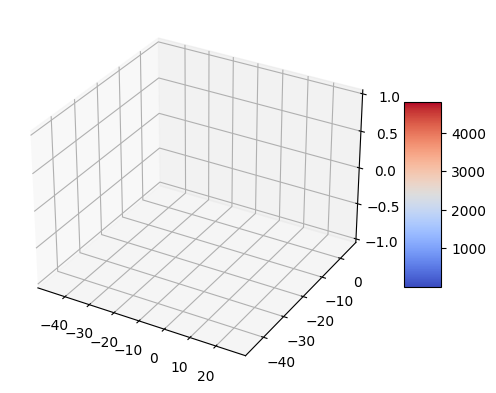

In [117]:
# kill_2

generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]




fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x1,y1,z1 = xyz_gen(c_dist, function_a)
ax.scatter(x1,y1,z1 , c='g', marker='^',alpha =0.7)

x,y,z = xyz_gen(generation, function_a)
ax.scatter(x,y,z , c='r', marker='^')

In [118]:
## Automate evolution

nr_epochs = 30
last_generation = experiment.evolve(nr_epochs)
fit = [function_a(x) for x in last_generation] 
print("fit:",fit)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)


x,y,z = xyz_gen(last_generation, function_a)
ax.scatter(x,y,z , c='b', marker='^')

Epochs 0/30
Evolution process ended!
Last generation: [[-2, 10], [-20, 18], [-44, -2], [-44, -2], [20, -6], [-5, -26], [-5, -26], [-22, -18], [-22, -18], [-47, -38]]
Epochs 1/30
Evolution process ended!
Last generation: [[-13, -18], [-4, -8], [-4, -8], [-4, -8], [-9, -6], [-9, -6], [-9, -6], [0, 4], [0, 4], [0, 4]]
Epochs 2/30
Evolution process ended!
Last generation: [[-2, 0], [-4, -4], [-6, -12], [-6, -12], [-2, 0], [-3, -8], [-3, -8], [-4, -13], [-4, -13], [-6, -21]]
Epochs 3/30
Evolution process ended!
Last generation: [[0, -6], [0, 0], [1, -1], [1, -1], [-2, -5], [0, -6], [0, -6], [0, 0], [0, 0], [1, -1]]
Epochs 4/30
Evolution process ended!
Last generation: [[1, -1], [1, -1], [0, -2], [0, -2], [1, -1], [0, -2], [0, -2], [0, -2], [0, -2], [-1, -4]]
Epochs 5/30
Evolution process ended!
Last generation: [[0, -1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 1], [0, 1], [0, 1]]
Epochs 6/30
Evolution process ended!
Last generation: [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0

ValueError: min() arg is an empty sequence